In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models ,layers
import matplotlib as plt

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[118. 106. 106.]
  [139. 127. 127.]
  [144. 132. 132.]
  ...
  [132. 123. 126.]
  [150. 141. 144.]
  [124. 115. 118.]]

 [[137. 125. 125.]
  [118. 106. 106.]
  [116. 104. 104.]
  ...
  [147. 138. 141.]
  [165. 156. 159.]
  [137. 128. 131.]]

 [[140. 128. 128.]
  [127. 115. 115.]
  [144. 132. 132.]
  ...
  [138. 129. 132.]
  [152. 143. 146.]
  [128. 119. 122.]]

 ...

 [[178. 169. 172.]
  [177. 168. 171.]
  [149. 140. 143.]
  ...
  [168. 159. 164.]
  [171. 162. 167.]
  [161. 152. 157.]]

 [[169. 160. 163.]
  [174. 165. 168.]
  [154. 145. 148.]
  ...
  [177. 168. 173.]
  [185. 176. 181.]
  [177. 168. 173.]]

 [[181. 172. 175.]
  [181. 172. 175.]
  [132. 123. 126.]
  ...
  [170. 161. 166.]
  [177. 168. 173.]
  [169. 160. 165.]]]


In [10]:
import matplotlib.pyplot as plt 

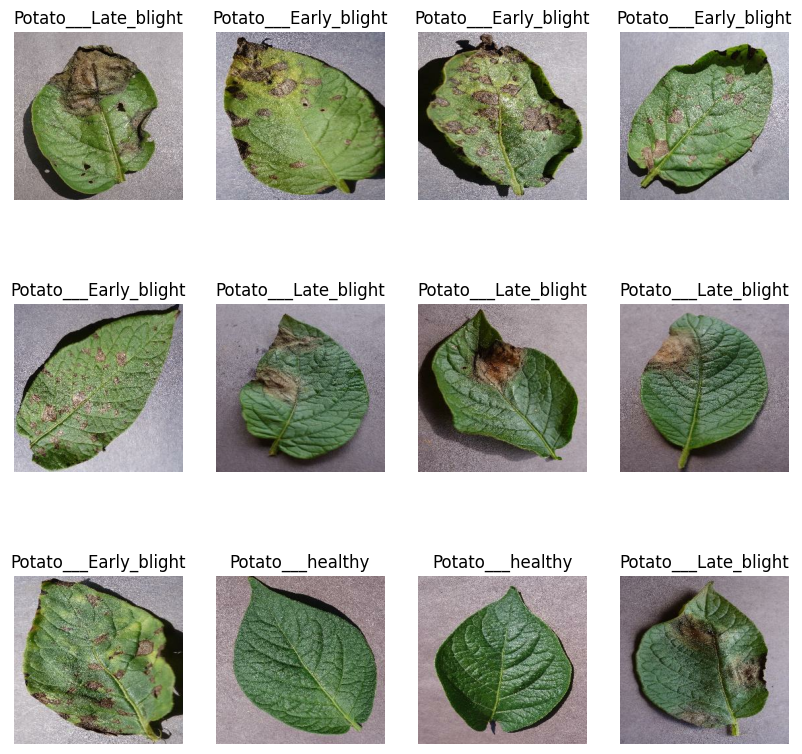

In [11]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [12]:
len(dataset)

68

In [ ]:
80% ==> training
20% ==> 10% validation , 10% test

In [14]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds= dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [17]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds= test_ds.skip(6)
len(test_ds)

8

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [27]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 219s 4s/step - loss: 0.8936 - accuracy: 0.4907 - val_loss: 0.8461 - val_accuracy: 0.4531
Epoch 2/50
54/54 [==============================] - 160s 3s/step - loss: 0.7863 - accuracy: 0.6568 - val_loss: 0.5975 - val_accuracy: 0.8073
Epoch 3/50
54/54 [==============================] - 157s 3s/step - loss: 0.5642 - accuracy: 0.7760 - val_loss: 0.4706 - val_accuracy: 0.8281
Epoch 4/50
54/54 [==============================] - 157s 3s/step - loss: 0.4494 - accuracy: 0.8183 - val_loss: 0.3858 - val_accuracy: 0.8490
Epoch 5/50
54/54 [==============================] - 161s 3s/step - loss: 0.3224 - accuracy: 0.8733 - val_loss: 0.3558 - val_accuracy: 0.8333
Epoch 6/50
54/54 [==============================] - 154s 3s/step - loss: 0.2732 - accuracy: 0.8906 - val_loss: 0.2534 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 154s 3s/step - loss: 0.2496 - accuracy: 0.9028 - val_loss: 0.2299 - val_accuracy: 0.9115
Epoch 8/50
54

In [32]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 9s 562ms/step - loss: 0.0600 - accuracy: 0.9805


In [33]:
scores

[0.05995229631662369, 0.98046875]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

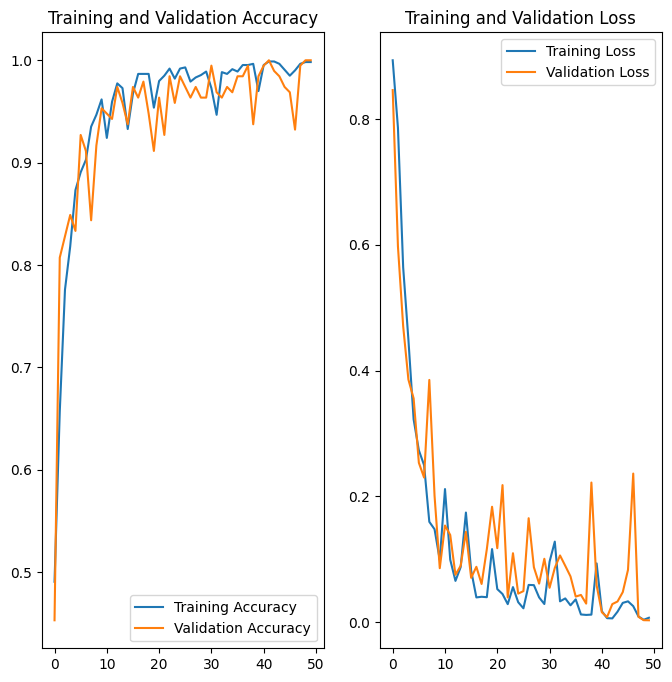

In [44]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
np.argmax([1.0000000e+00, 9.9674663e-14, 4.9049444e-31])

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 1s 606ms/step
predicted label: Potato___healthy


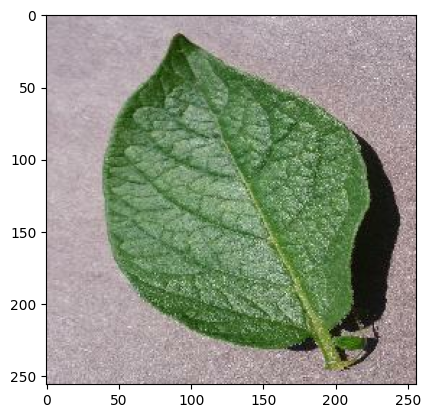

In [55]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [56]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 45ms/step


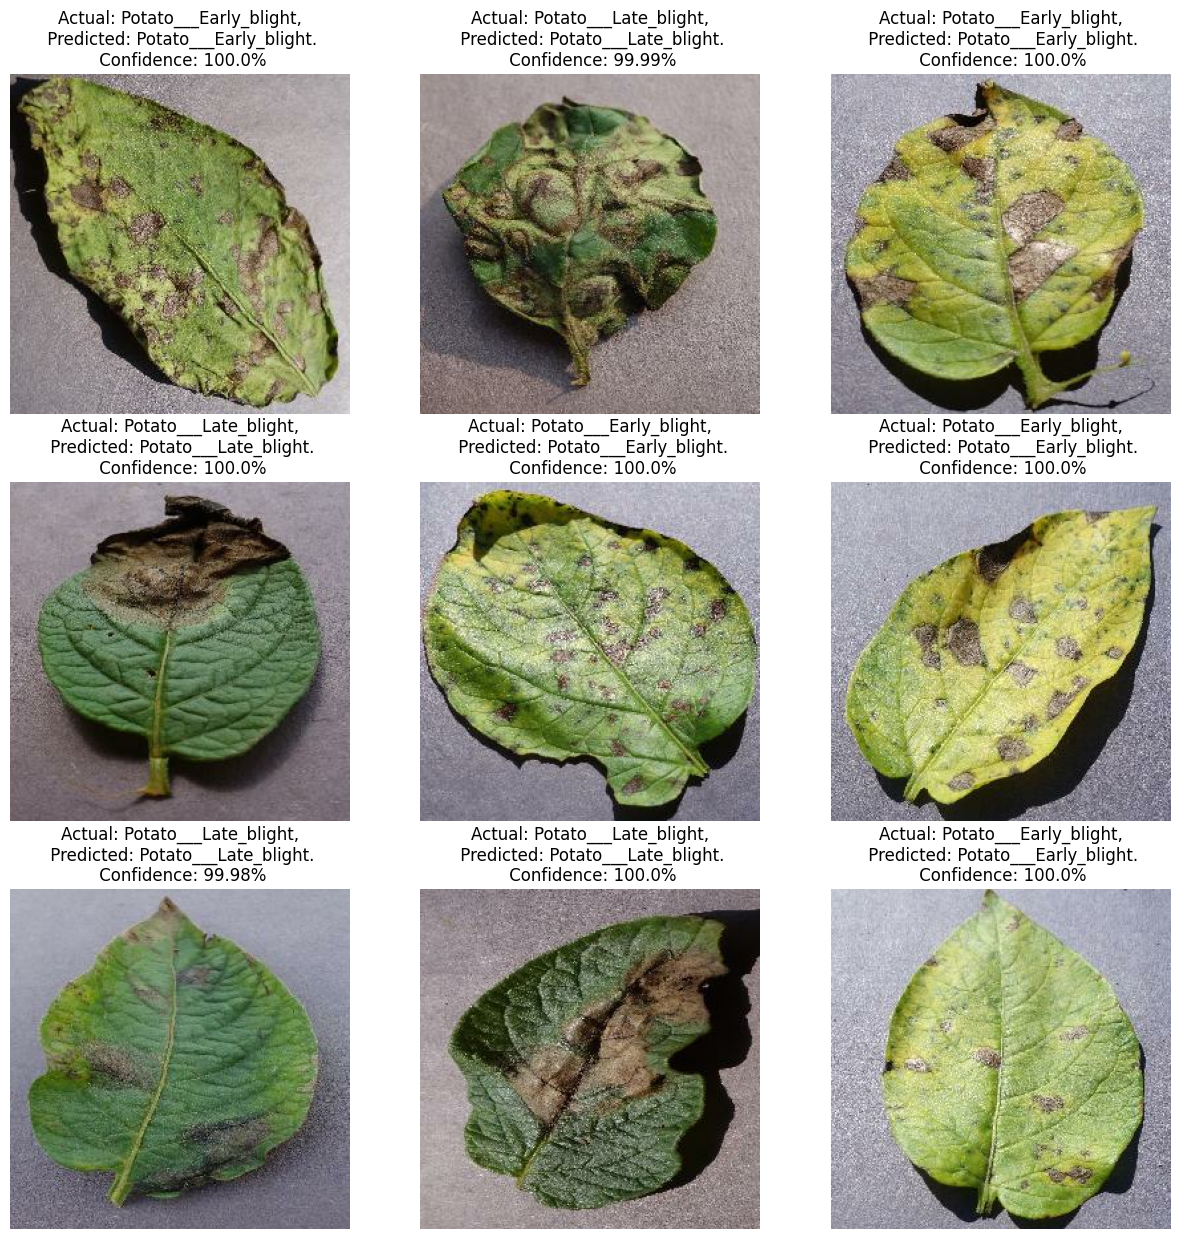

In [61]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        

In [72]:
import os
model_version=max([int(i) for i in os.listdir("../models")+ [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets


In [9]:
arr= [1,2,3,4,5]
for i in arr:
    print(i)
for i in range(len(arr)-1, -1, -1):
    print(arr[i])

1
2
3
4
5
5
4
3
2
1
